In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import warnings

# Ignore a specific warning 
warnings.filterwarnings("ignore")

In [3]:
fed_reserve=['/Users/antoniogondim/Downloads/house_prices/MORTGAGE30US.csv','/Users/antoniogondim/Downloads/house_prices/RRVRUSQ156N.csv','/Users/antoniogondim/Downloads/house_prices/CPIAUCSL.csv']

In [4]:
df_fed_res=[pd.read_csv(x) for x in fed_reserve]

In [5]:
df_fed_res[0]

,DATE,MORTGAGE30US
0,1971-04-02,7.33
1,1971-04-09,7.31
2,1971-04-16,7.31
3,1971-04-23,7.31
4,1971-04-30,7.29
...,...,...
2676,2022-07-14,5.51
2677,2022-07-21,5.54
2678,2022-07-28,5.30
2679,2022-08-04,4.99


In [6]:
df_fed_res[1]

,DATE,RRVRUSQ156N
0,1956-01-01,6.2
1,1956-04-01,5.9
2,1956-07-01,6.3
3,1956-10-01,5.8
4,1957-01-01,5.3
...,...,...
261,2021-04-01,6.2
262,2021-07-01,5.8
263,2021-10-01,5.6
264,2022-01-01,5.8


In [7]:
df_fed_res[2]

,DATE,CPIAUCSL
0,1947-01-01,21.480
1,1947-02-01,21.620
2,1947-03-01,22.000
3,1947-04-01,22.000
4,1947-05-01,21.950
...,...,...
902,2022-03-01,287.708
903,2022-04-01,288.663
904,2022-05-01,291.474
905,2022-06-01,295.328


In [8]:
fed=pd.concat(df_fed_res, axis=0)
fed

,DATE,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
0,1971-04-02,7.33,NaN,NaN
1,1971-04-09,7.31,NaN,NaN
2,1971-04-16,7.31,NaN,NaN
3,1971-04-23,7.31,NaN,NaN
4,1971-04-30,7.29,NaN,NaN
...,...,...,...,...
902,2022-03-01,NaN,NaN,287.708
903,2022-04-01,NaN,NaN,288.663
904,2022-05-01,NaN,NaN,291.474
905,2022-06-01,NaN,NaN,295.328


In [9]:
for x in range(1,4):
    
    print(fed.iloc[:,x].isnull().value_counts())

False    2681
True     1173
Name: MORTGAGE30US, dtype: int64
True     3588
False     266
Name: RRVRUSQ156N, dtype: int64
True     2947
False     907
Name: CPIAUCSL, dtype: int64


In [10]:
fed=fed.ffill()
fed

,DATE,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
0,1971-04-02,7.33,NaN,NaN
1,1971-04-09,7.31,NaN,NaN
2,1971-04-16,7.31,NaN,NaN
3,1971-04-23,7.31,NaN,NaN
4,1971-04-30,7.29,NaN,NaN
...,...,...,...,...
902,2022-03-01,5.22,5.6,287.708
903,2022-04-01,5.22,5.6,288.663
904,2022-05-01,5.22,5.6,291.474
905,2022-06-01,5.22,5.6,295.328


In [11]:
fed=fed.ffill()
for x in fed.columns:
    print(fed[x].isnull().value_counts())

False    3854
Name: DATE, dtype: int64
False    3854
Name: MORTGAGE30US, dtype: int64
True     2681
False    1173
Name: RRVRUSQ156N, dtype: int64
True     2947
False     907
Name: CPIAUCSL, dtype: int64


In [12]:
fed['DATE']=pd.to_datetime(fed['DATE'])

In [13]:
fed.sort_values(by=['DATE'],inplace=True)

In [14]:
fed=fed.ffill()
fed

,DATE,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
0,1947-01-01,5.22,5.6,21.480
1,1947-02-01,5.22,5.6,21.620
2,1947-03-01,5.22,5.6,22.000
3,1947-04-01,5.22,5.6,22.000
4,1947-05-01,5.22,5.6,21.950
...,...,...,...,...
2676,2022-07-14,5.51,5.6,295.271
2677,2022-07-21,5.54,5.6,295.271
2678,2022-07-28,5.30,5.6,295.271
2679,2022-08-04,4.99,5.6,295.271


In [15]:
for x in fed.columns:
    print(fed[x].isnull().value_counts())

False    3854
Name: DATE, dtype: int64
False    3854
Name: MORTGAGE30US, dtype: int64
False    3854
Name: RRVRUSQ156N, dtype: int64
False    3854
Name: CPIAUCSL, dtype: int64


In [16]:
fed.dtypes

DATE            datetime64[ns]
MORTGAGE30US           float64
RRVRUSQ156N            float64
CPIAUCSL               float64
dtype: object

In [17]:
fed.index=fed.DATE


In [18]:
fed.drop('DATE',axis=1,inplace=True)
fed

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
1947-01-01,5.22,5.6,21.480
1947-02-01,5.22,5.6,21.620
1947-03-01,5.22,5.6,22.000
1947-04-01,5.22,5.6,22.000
1947-05-01,5.22,5.6,21.950
...,...,...,...
2022-07-14,5.51,5.6,295.271
2022-07-21,5.54,5.6,295.271
2022-07-28,5.30,5.6,295.271


In [19]:
fed.index.name=None
fed


,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
1947-01-01,5.22,5.6,21.480
1947-02-01,5.22,5.6,21.620
1947-03-01,5.22,5.6,22.000
1947-04-01,5.22,5.6,22.000
1947-05-01,5.22,5.6,21.950
...,...,...,...
2022-07-14,5.51,5.6,295.271
2022-07-21,5.54,5.6,295.271
2022-07-28,5.30,5.6,295.271
2022-08-04,4.99,5.6,295.271


In [20]:
zillow=['/Users/antoniogondim/Downloads/house_prices/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv','/Users/antoniogondim/Downloads/house_prices/Metro_median_sale_price_uc_sfrcondo_week.csv']

In [21]:
dfz=[pd.read_csv(x) for x in zillow]
dfz[0]

,RegionID,SizeRank,RegionName,RegionType,StateName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,...,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31
0,102001,0,United States,Country,NaN,108641.264685,108472.728880,108532.280074,108739.077466,108986.621607,...,318648.557319,322227.276010,327377.250887,332206.790140,338002.747686,344042.433111,350515.841789,354717.722904,357473.327397,357107.271636
1,394913,1,"New York, NY",Msa,NY,188550.306900,186833.460516,186448.089063,186132.003064,186023.979536,...,573099.183713,575351.020713,577891.698212,582902.117225,588521.056859,598696.268370,607668.479848,615457.379763,619722.310507,621307.894902
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,186683.041088,186015.165187,185723.797105,185700.155256,185569.298179,...,854076.999683,862487.347366,874894.413168,888106.123973,902359.871460,931407.638755,950811.533011,955845.190020,933648.296046,929753.425908
3,394463,3,"Chicago, IL",Msa,IL,147341.931571,147341.152880,146420.379418,147841.918776,148371.389735,...,288899.103704,290304.887853,291998.702189,294814.368208,298667.824107,304076.779527,308802.105551,314032.378286,315084.424557,314178.550606
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,113283.512989,113199.113561,113519.423633,114048.064719,114287.444295,...,338187.525418,344409.906452,351186.037787,359878.893639,370452.369604,376522.090399,391696.585402,399613.324087,401254.775442,396903.773679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,394767,929,"Lamesa, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,92899.038250,92999.754549,97296.415265,98217.639150,100010.331287,101084.700150,101376.966610,103321.694906,105794.451088,106244.149398
909,753874,930,"Craig, CO",Msa,CO,66532.401041,66795.083062,67178.691523,67680.532389,67149.040671,...,244845.354879,245187.643589,253767.119261,254926.311559,253700.139970,255387.314731,254937.506748,256166.409003,266655.039121,268370.634013
910,394968,931,"Pecos, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,169404.973627,171295.739580,178176.871040,178929.217811,179113.938659,181811.015503,184752.025925,187573.847282,192967.342193,193366.794326
911,395188,932,"Vernon, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,80043.974772,80196.507293,NaN,86966.994296,88535.643138,88556.495891,88921.719463,89261.931509,92129.408692,93197.602418


In [22]:
dfz[1]

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-02,2008-02-09,2008-02-16,2008-02-23,2008-03-01,...,2022-05-07,2022-05-14,2022-05-21,2022-05-28,2022-06-04,2022-06-11,2022-06-18,2022-06-25,2022-07-02,2022-07-09
0,102001,0,United States,Country,NaN,190000.0,190000.0,193000.0,189900.0,194900.0,...,369900.0,370000.0,370000.0,375000.0,375000.0,370000.0,375000.0,370000.0,370000.0,362500.0
1,394913,1,"New York, NY",Msa,NY,400000.0,418250.0,420000.0,420000.0,400000.0,...,550000.0,555000.0,550000.0,575000.0,575000.0,578000.0,590000.0,582000.0,585000.0,595000.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,497500.0,515000.0,520000.0,525000.0,498250.0,...,914000.0,925000.0,925000.0,951000.0,950000.0,920500.0,925000.0,900000.0,900500.0,906000.0
3,394463,3,"Chicago, IL",Msa,IL,245000.0,245000.0,251000.0,255000.0,255000.0,...,315000.0,310000.0,315500.0,315000.0,330000.0,324950.0,335000.0,325000.0,325000.0,315000.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,144250.0,148900.0,139000.0,143700.0,145900.0,...,422000.0,430000.0,430000.0,425000.0,440000.0,425000.0,427750.0,426000.0,420000.0,420000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,394528,90,"Daytona Beach, FL",Msa,FL,NaN,170000.0,182400.0,170000.0,170000.0,...,340500.0,345000.0,327700.0,345000.0,350000.0,343250.0,359900.0,352000.0,336000.0,342990.0
80,394531,91,"Des Moines, IA",Msa,IA,138000.0,160000.0,150000.0,151750.0,154500.0,...,270000.0,285250.0,295000.0,273450.0,301000.0,290000.0,300900.0,281900.0,289250.0,280000.0
81,395006,100,"Provo, UT",Msa,UT,NaN,206000.0,215500.0,210000.0,210000.0,...,527000.0,540000.0,535000.0,552500.0,543750.0,571000.0,530300.0,569900.0,539950.0,572500.0
82,394549,104,"Durham, NC",Msa,NC,210000.0,170000.0,170500.0,197500.0,180000.0,...,456000.0,450000.0,428500.0,480000.0,465000.0,440000.0,450250.0,416000.0,465000.0,435250.0


In [23]:
x2=dfz[1].iloc[1,:]
x1=dfz[0].iloc[1,:]

In [24]:
x1=x1.iloc[5:]
x2=x2.iloc[5:]

In [25]:
x1

1996-01-31    188550
1996-02-29    186833
1996-03-31    186448
1996-04-30    186132
1996-05-31    186024
               ...  
2022-03-31    598696
2022-04-30    607668
2022-05-31    615457
2022-06-30    619722
2022-07-31    621308
Name: 1, Length: 319, dtype: object

In [26]:
x2.index=pd.to_datetime(x2.index)

In [27]:
#x1=x1.iloc[0:304]
x1.index=pd.to_datetime(x1.index)

In [28]:
x1=pd.DataFrame(x1)
x1

,1
1996-01-31,188550
1996-02-29,186833
1996-03-31,186448
1996-04-30,186132
1996-05-31,186024
...,...
2022-03-31,598696
2022-04-30,607668
2022-05-31,615457
2022-06-30,619722


In [29]:
x2=pd.DataFrame(x2)


In [30]:
#x1['month']=pd.DatetimeIndex(x1.index).month
#x2['month']=pd.DatetimeIndex(x2.index).month

In [31]:
x1['month']=pd.DatetimeIndex(x1.index).to_period('M')

In [32]:
x1

,1,month
1996-01-31,188550,1996-01
1996-02-29,186833,1996-02
1996-03-31,186448,1996-03
1996-04-30,186132,1996-04
1996-05-31,186024,1996-05
...,...,...
2022-03-31,598696,2022-03
2022-04-30,607668,2022-04
2022-05-31,615457,2022-05
2022-06-30,619722,2022-06


In [33]:
x2['month']=pd.DatetimeIndex(x2.index).to_period('M')

In [34]:
x1['date']=x1.index
x2['date']=x2.index

In [35]:
x1.dtypes

1                object
month         period[M]
date     datetime64[ns]
dtype: object

In [36]:
x1

,1,month,date
1996-01-31,188550,1996-01,1996-01-31
1996-02-29,186833,1996-02,1996-02-29
1996-03-31,186448,1996-03,1996-03-31
1996-04-30,186132,1996-04,1996-04-30
1996-05-31,186024,1996-05,1996-05-31
...,...,...,...
2022-03-31,598696,2022-03,2022-03-31
2022-04-30,607668,2022-04,2022-04-30
2022-05-31,615457,2022-05,2022-05-31
2022-06-30,619722,2022-06,2022-06-30


In [37]:
x2

,1,month,date
2008-02-02,400000,2008-02,2008-02-02
2008-02-09,418250,2008-02,2008-02-09
2008-02-16,420000,2008-02,2008-02-16
2008-02-23,420000,2008-02,2008-02-23
2008-03-01,400000,2008-03,2008-03-01
...,...,...,...
2022-06-11,578000,2022-06,2022-06-11
2022-06-18,590000,2022-06,2022-06-18
2022-06-25,582000,2022-06,2022-06-25
2022-07-02,585000,2022-07,2022-07-02


In [38]:
x=x1.merge(x2,on='month')

In [39]:
x

,1_x,month,date_x,1_y,date_y
0,459385,2008-02,2008-02-29,400000,2008-02-02
1,459385,2008-02,2008-02-29,418250,2008-02-09
2,459385,2008-02,2008-02-29,420000,2008-02-16
3,459385,2008-02,2008-02-29,420000,2008-02-23
4,455085,2008-03,2008-03-31,400000,2008-03-01
...,...,...,...,...,...
749,619722,2022-06,2022-06-30,578000,2022-06-11
750,619722,2022-06,2022-06-30,590000,2022-06-18
751,619722,2022-06,2022-06-30,582000,2022-06-25
752,621308,2022-07,2022-07-31,585000,2022-07-02


In [40]:
x.date_x=x.date_y

In [41]:
x

,1_x,month,date_x,1_y,date_y
0,459385,2008-02,2008-02-02,400000,2008-02-02
1,459385,2008-02,2008-02-09,418250,2008-02-09
2,459385,2008-02,2008-02-16,420000,2008-02-16
3,459385,2008-02,2008-02-23,420000,2008-02-23
4,455085,2008-03,2008-03-01,400000,2008-03-01
...,...,...,...,...,...
749,619722,2022-06,2022-06-11,578000,2022-06-11
750,619722,2022-06,2022-06-18,590000,2022-06-18
751,619722,2022-06,2022-06-25,582000,2022-06-25
752,621308,2022-07,2022-07-02,585000,2022-07-02


In [42]:
x.date_y=x.date_y.sort_values()
x.index=x.date_y
x.drop(['date_x','date_y','month'],axis=1,inplace=True)

In [43]:
x.columns=['price','value']
x

,price,value
date_y,,
2008-02-02,459385,400000
2008-02-09,459385,418250
2008-02-16,459385,420000
2008-02-23,459385,420000
2008-03-01,455085,400000
...,...,...
2022-06-11,619722,578000
2022-06-18,619722,590000
2022-06-25,619722,582000


In [44]:
x.index=x.index.sort_values()

In [45]:
x

,price,value
date_y,,
2008-02-02,459385,400000
2008-02-09,459385,418250
2008-02-16,459385,420000
2008-02-23,459385,420000
2008-03-01,455085,400000
...,...,...
2022-06-11,619722,578000
2022-06-18,619722,590000
2022-06-25,619722,582000


In [46]:
x.index.name = None
x

,price,value
2008-02-02,459385,400000
2008-02-09,459385,418250
2008-02-16,459385,420000
2008-02-23,459385,420000
2008-03-01,455085,400000
...,...,...
2022-06-11,619722,578000
2022-06-18,619722,590000
2022-06-25,619722,582000
2022-07-02,621308,585000


In [47]:
#Now notice that the fed dataframe is 2 days delayed with respect to x dataframe. 
#Let's fix that in order to concat them

In [48]:
from datetime import timedelta
fed.index=fed.index+timedelta(days=2)
#there are more date matches than when we do x.index=x.index-timedelta(days=2),
#due to the fact that not all years have the same quantity of days, thus the two shiftings aren't equivalent

In [49]:
df=fed.merge(x,right_index=True,left_index=True)
df.columns= ["interest", "vacancy", "cpi", "price", "value"]

In [50]:
df
#Now we've got all we need to emply ML models

,interest,vacancy,cpi,price,value
2008-02-02,5.68,10.1,212.174,459385,400000
2008-02-09,5.67,5.6,212.687,459385,418250
2008-02-16,5.72,5.6,212.687,459385,420000
2008-02-23,6.04,5.6,212.687,459385,420000
2008-03-01,6.24,5.6,212.687,455085,400000
...,...,...,...,...,...
2022-06-11,5.23,5.6,295.328,619722,578000
2022-06-18,5.78,5.6,295.328,619722,590000
2022-06-25,5.81,5.6,295.328,619722,582000
2022-07-02,5.70,5.6,295.328,621308,585000


Let's go ahead and do some data exploration, through visualization:

In [51]:
#plotting price data along with time
import matplotlib as plot

<Axes: >

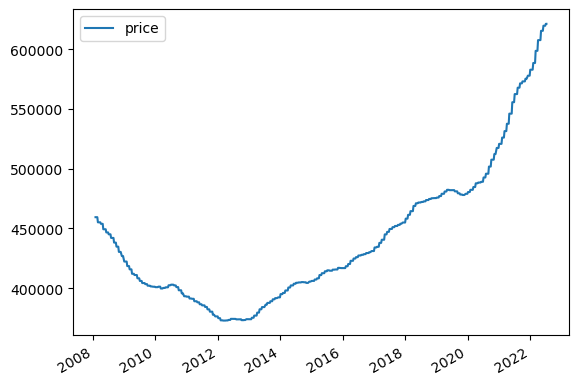

In [52]:
df.plot.line(y="price", use_index=True)

In [53]:
#now let's take into account the inflation influence and creat the adjusted price column
df['adj_price']=df['price']/df['cpi']*100

<Axes: >

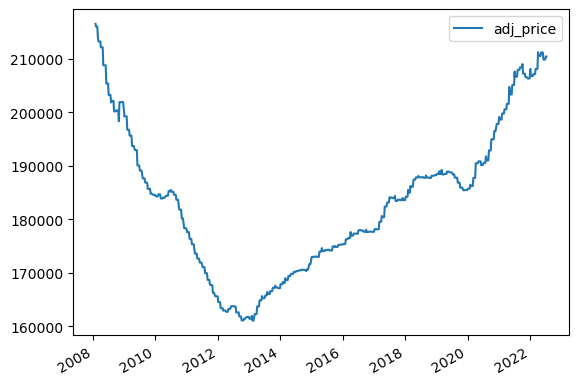

In [54]:
df.plot.line(y='adj_price', use_index=True)
#notice that since we are not including inflation in the price, the price range seems more uniform

In [55]:
df['adj_value']=df['value']/df['cpi']*100

now let's set up our target column which is the price prediction, we'll do so by using the shift method, which in a fixed row pulls back certain amount of time its adj_value-from the future- into the past, we're gonna assing that value into the target variable, so that we're gonna be able to compare both columns, the adj_price column and the one related to the next_quarter adjusted price
Moreover, notice that in our index column, the time unit is a week, so when using the shift method, its entry will be an integer that corresponds to the number of units-i.e, weeks- that will be shifted from the index 

In [56]:
df['next_quarter_adj_price']=df['adj_price'].shift(-13)

In [57]:
df

,interest,vacancy,cpi,price,value,adj_price,adj_value,next_quarter_adj_price
2008-02-02,5.68,10.1,212.174,459385,400000,216513,188525,208765
2008-02-09,5.67,5.6,212.687,459385,418250,215991,196650,208765
2008-02-16,5.72,5.6,212.687,459385,420000,215991,197473,208765
2008-02-23,6.04,5.6,212.687,459385,420000,215991,197473,208765
2008-03-01,6.24,5.6,212.687,455085,400000,213969,188070,208765
...,...,...,...,...,...,...,...,...
2022-06-11,5.23,5.6,295.328,619722,578000,209842,195715,NaN
2022-06-18,5.78,5.6,295.328,619722,590000,209842,199778,NaN
2022-06-25,5.81,5.6,295.328,619722,582000,209842,197069,NaN
2022-07-02,5.70,5.6,295.328,621308,585000,210379,198085,NaN


the fact that the last rows has missing data is because we have no longer values 13 weeks ahead from those last initial row

In [58]:
df.dropna(inplace=True)
print(df.columns)
df['change']=(df['next_quarter_adj_price']>df['adj_price']).astype('int')
df
target_column=df['change']

Index(['interest', 'vacancy', 'cpi', 'price', 'value', 'adj_price',
       'adj_value', 'next_quarter_adj_price'],
      dtype='object')


In [59]:
from sklearn.preprocessing import StandardScaler
df1=df.drop(axis=0,columns=['change'])
scaler=StandardScaler()
df_standardized=scaler.fit_transform(df1)
df_standardized=pd.DataFrame(df_standardized)
#df_standardized=df_standardized.drop(columns=[0],axis=1)
df_standardized.index=df.index
df_standardized['change']=df['change']
df_standardized
#notice that the column change is attached to df_standardized,since it must be preserved from df
#in order to have a reasonable prediction

,0,1,2,3,4,5,6,7,change
2008-02-02,1.853659,3.889449,-1.523250,0.405205,-0.038216,2.520583,1.747931,1.964748,0
2008-02-09,1.841295,-0.356782,-1.494084,0.405205,0.366560,2.481572,2.439429,1.964748,0
2008-02-16,1.903116,-0.356782,-1.494084,0.405205,0.405374,2.481572,2.509448,1.964748,0
2008-02-23,2.298771,-0.356782,-1.494084,0.405205,0.405374,2.481572,2.509448,1.964748,0
2008-03-01,2.546055,-0.356782,-1.494084,0.325446,-0.038216,2.330557,1.709236,1.964748,0
...,...,...,...,...,...,...,...,...,...
2022-03-12,-0.408993,-0.356782,2.771168,2.989450,2.956018,1.891477,1.529053,2.046046,1
2022-03-19,-0.025702,-0.356782,2.771168,2.989450,2.734223,1.891477,1.233276,2.046046,1
2022-03-26,0.295767,-0.356782,2.771168,2.989450,2.845121,1.891477,1.381165,2.046046,1
2022-04-02,0.604873,-0.356782,2.771168,3.155885,2.956018,2.124433,1.529053,2.086565,0


now let's create a new column to indicate whether the price increases or decreases a quarter - 3 months or 13 weeks - from now

In [60]:
#df_standardized['change']=(df_standardized[7]>df_standardized[6]).astype(int)
#we apply astype(int) in order to have numerical values as this column's date type
df_standardized

,0,1,2,3,4,5,6,7,change
2008-02-02,1.853659,3.889449,-1.523250,0.405205,-0.038216,2.520583,1.747931,1.964748,0
2008-02-09,1.841295,-0.356782,-1.494084,0.405205,0.366560,2.481572,2.439429,1.964748,0
2008-02-16,1.903116,-0.356782,-1.494084,0.405205,0.405374,2.481572,2.509448,1.964748,0
2008-02-23,2.298771,-0.356782,-1.494084,0.405205,0.405374,2.481572,2.509448,1.964748,0
2008-03-01,2.546055,-0.356782,-1.494084,0.325446,-0.038216,2.330557,1.709236,1.964748,0
...,...,...,...,...,...,...,...,...,...
2022-03-12,-0.408993,-0.356782,2.771168,2.989450,2.956018,1.891477,1.529053,2.046046,1
2022-03-19,-0.025702,-0.356782,2.771168,2.989450,2.734223,1.891477,1.233276,2.046046,1
2022-03-26,0.295767,-0.356782,2.771168,2.989450,2.845121,1.891477,1.381165,2.046046,1
2022-04-02,0.604873,-0.356782,2.771168,3.155885,2.956018,2.124433,1.529053,2.086565,0


In [61]:
#the numbers of entries are balanced so that won't interfere when we deploy the ML model
df_standardized.columns=['interest', 'vacancy', 'cpi', 'price', 'value', 'adj_price',
       'adj_value', 'next_quarter_adj_price', 'change']
print(df_standardized['change'].value_counts())
df_standardized

1    437
0    312
Name: change, dtype: int64


,interest,vacancy,cpi,price,value,adj_price,adj_value,next_quarter_adj_price,change
2008-02-02,1.853659,3.889449,-1.523250,0.405205,-0.038216,2.520583,1.747931,1.964748,0
2008-02-09,1.841295,-0.356782,-1.494084,0.405205,0.366560,2.481572,2.439429,1.964748,0
2008-02-16,1.903116,-0.356782,-1.494084,0.405205,0.405374,2.481572,2.509448,1.964748,0
2008-02-23,2.298771,-0.356782,-1.494084,0.405205,0.405374,2.481572,2.509448,1.964748,0
2008-03-01,2.546055,-0.356782,-1.494084,0.325446,-0.038216,2.330557,1.709236,1.964748,0
...,...,...,...,...,...,...,...,...,...
2022-03-12,-0.408993,-0.356782,2.771168,2.989450,2.956018,1.891477,1.529053,2.046046,1
2022-03-19,-0.025702,-0.356782,2.771168,2.989450,2.734223,1.891477,1.233276,2.046046,1
2022-03-26,0.295767,-0.356782,2.771168,2.989450,2.845121,1.891477,1.381165,2.046046,1
2022-04-02,0.604873,-0.356782,2.771168,3.155885,2.956018,2.124433,1.529053,2.086565,0


In [62]:
predictors=['interest', 'vacancy', 'cpi', 'price', 'value', 'adj_price',
       'adj_value', 'next_quarter_adj_price']
target=['change']

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import numpy as np

In [64]:
def predict(train,test,predictors,target):
    rf=RandomForestClassifier(min_samples_split=25,random_state=1)    
    rf.fit(train[predictors],train[target])
    preds=rf.predict(test[predictors])
    return preds
    

cross validation doens't work on time series data, since we need to predict the future data using the past, but when we train our model using cross validation and get the accuracy test, there is no such order, we end up usingdata from future to predict the past. That makes the training model really good, but it doens't work to use it in the real world.

That is why we will avoid using cross validation.
What we're gonna use here is BackTesting, which is usually used for time series data, and it let us generate prediction, but respecting the order in which we predict only the future data from the past

In [65]:
START=260 #start with five years of data, and then make 
#predictions for the next year. Each year has 52 weeks
STEP=52
def backtest(df, predictors, target):
    all_preds=[]
    for i in range(START,df.shape[0],STEP):
        train = df.iloc[:i]
        test = df.iloc[i:(i+STEP)]
        all_preds.append(predict(train,test,predictors,target))
    preds=np.concatenate(all_preds)
    return preds, accuracy_score(df.iloc[START:][target], preds)
#accuracy_score is the metric imported from sklearn    

In [66]:
preds,accuracy=backtest(df_standardized,predictors,target)

In [67]:
accuracy
#percentage in which the model made correct predictions

0.48057259713701433

We should enhance our model to better predict the 'change' column;
one of the issues here is the difference of amount of 0s and 1s in the change column.
Notice that our target column is made only of 0s and 1s, and since we are predicting future values based on each split of the data set, it is natural to deduce that the fact that there are much more 1s than 0s will interfere negatively on our prediction accuracy.
So, we solve that by assigning different to the different classes: 0s and 1s of our 'change' column.



In [68]:
class_weights={1:float(312/437),0:1}
def predict(train,test,predictors,target):
    rf=RandomForestClassifier(min_samples_split=10,random_state=1,class_weight=class_weights)
    rf.fit(train[predictors],train[target])
    preds=rf.predict(test[predictors])
    return preds
preds,accuracy=backtest(df,predictors,target)

In [69]:
accuracy


0.5501022494887525

In [70]:
#now using the standardized dataframe
preds,accuracy=backtest(df_standardized,predictors,target)
accuracy


0.5480572597137015

## Notice that the accuracy has slightly decreased after we standardize the dataset, so it is better to keep the data as it is in this case.

Now, in order to enhance the accuracy once again, let's use feauture engeneering, in order to provide additional-more specifically, about the recent trending house prices- to the model and improve its ability to distinguish between the classes effectively.

Here we'll use the pandas rolling method, and pass min_period=1.
This method provides the rolling window calculation, through the Window Rolling Mean (Moving Average)
The moving average calculation creates an updated average value for each row based on the window we specify. The calculation is also called a “rolling mean” because it's calculating an average of values within a specified range for each row as you go along the DataFrame.

In [71]:
#adding the averages for the past year columns to the dataframe df
#firstly creating a new data frame called yearly
yearly=df.rolling(52,min_periods=1).mean()#rolling mean

yearly.drop(axis=1,columns=['change'],inplace=True)

In [72]:
yearly_ratios=[p+'_year' for p in predictors]#creating a new column names list
#now adding that to the df
df[yearly_ratios]=df[predictors]/yearly[predictors]
df['change']=target_column
df1=df
print(df1.columns)
df1

Index(['interest', 'vacancy', 'cpi', 'price', 'value', 'adj_price',
       'adj_value', 'next_quarter_adj_price', 'change', 'interest_year',
       'vacancy_year', 'cpi_year', 'price_year', 'value_year',
       'adj_price_year', 'adj_value_year', 'next_quarter_adj_price_year'],
      dtype='object')


,interest,vacancy,cpi,price,value,adj_price,adj_value,next_quarter_adj_price,change,interest_year,vacancy_year,cpi_year,price_year,value_year,adj_price_year,adj_value_year,next_quarter_adj_price_year
2008-02-02,5.68,10.1,212.174,459385,400000,216513,188525,208765,0,1.000000,1.000000,1.000000,1,1,1,1,1
2008-02-09,5.67,5.6,212.687,459385,418250,215991,196650,208765,0,0.999119,0.713376,1.001207,1,1.0223,0.998793,1.0211,1
2008-02-16,5.72,5.6,212.687,459385,420000,215991,197473,208765,0,1.005272,0.788732,1.000805,1,1.01757,0.999195,1.01677,1
2008-02-23,6.04,5.6,212.687,459385,420000,215991,197473,208765,0,1.045435,0.832714,1.000603,1,1.01312,0.999396,1.01253,1
2008-03-01,6.24,5.6,212.687,455085,400000,213969,188070,208765,0,1.063032,0.861538,1.000483,0.992498,0.971699,0.992018,0.971243,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-12,3.85,5.6,287.708,598696,535000,208092,185952,209842,1,1.173987,0.989130,1.046541,1.05651,1.03109,1.00967,0.985077,1.0091
2022-03-19,4.16,5.6,287.708,598696,525000,208092,182477,209842,1,1.276450,0.989130,1.045007,1.05432,1.01033,1.00905,0.96662,1.00865
2022-03-26,4.42,5.6,287.708,598696,530000,208092,184215,209842,1,1.346377,0.989130,1.043478,1.05215,1.01828,1.00844,0.975608,1.00821
2022-04-02,4.67,5.6,287.708,607668,535000,211210,185952,210379,0,1.427127,0.991150,1.041953,1.06539,1.02601,1.02263,0.984417,1.01053


In [73]:
predictors1=['interest', 'vacancy', 'cpi', 'price', 'value', 'adj_price',
       'adj_value', 'next_quarter_adj_price', 'interest_year',
       'vacancy_year', 'cpi_year', 'price_year', 'value_year',
       'adj_price_year', 'adj_value_year', 'next_quarter_adj_price_year']
target=['change']

In [74]:
df1[predictors1]


,interest,vacancy,cpi,price,value,adj_price,adj_value,next_quarter_adj_price,interest_year,vacancy_year,cpi_year,price_year,value_year,adj_price_year,adj_value_year,next_quarter_adj_price_year
2008-02-02,5.68,10.1,212.174,459385,400000,216513,188525,208765,1.000000,1.000000,1.000000,1,1,1,1,1
2008-02-09,5.67,5.6,212.687,459385,418250,215991,196650,208765,0.999119,0.713376,1.001207,1,1.0223,0.998793,1.0211,1
2008-02-16,5.72,5.6,212.687,459385,420000,215991,197473,208765,1.005272,0.788732,1.000805,1,1.01757,0.999195,1.01677,1
2008-02-23,6.04,5.6,212.687,459385,420000,215991,197473,208765,1.045435,0.832714,1.000603,1,1.01312,0.999396,1.01253,1
2008-03-01,6.24,5.6,212.687,455085,400000,213969,188070,208765,1.063032,0.861538,1.000483,0.992498,0.971699,0.992018,0.971243,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-12,3.85,5.6,287.708,598696,535000,208092,185952,209842,1.173987,0.989130,1.046541,1.05651,1.03109,1.00967,0.985077,1.0091
2022-03-19,4.16,5.6,287.708,598696,525000,208092,182477,209842,1.276450,0.989130,1.045007,1.05432,1.01033,1.00905,0.96662,1.00865
2022-03-26,4.42,5.6,287.708,598696,530000,208092,184215,209842,1.346377,0.989130,1.043478,1.05215,1.01828,1.00844,0.975608,1.00821
2022-04-02,4.67,5.6,287.708,607668,535000,211210,185952,210379,1.427127,0.991150,1.041953,1.06539,1.02601,1.02263,0.984417,1.01053


In [75]:


preds,accuracy=backtest(df1,predictors1,target)

In [76]:
accuracy


0.754601226993865

 thus, after we performed the feature engineering, the accuracy was amazingly increased! Due to the last accuracy result, we won't be standardizing the data once again

### Data Visualization

In [77]:
preds=pd.DataFrame(preds)
df1[target].iloc[START:].reset_index().drop(axis=1,columns=['index'],inplace=True)
df1[target].iloc[START:]

,change
2013-01-05,1
2013-01-12,1
2013-01-19,1
2013-01-26,1
2013-02-02,1
...,...
2022-03-12,1
2022-03-19,1
2022-03-26,1
2022-04-02,0


In [78]:
preds.index=df1[target].iloc[START:].index
preds.columns=df1[target].iloc[START:].columns
preds

,change
2013-01-05,1
2013-01-12,1
2013-01-19,1
2013-01-26,1
2013-02-02,1
...,...
2022-03-12,0
2022-03-19,0
2022-03-26,0
2022-04-02,0


In [79]:
boolean_list=(preds==df1[target].iloc[START:])
boolean_list

,change
2013-01-05,True
2013-01-12,True
2013-01-19,True
2013-01-26,True
2013-02-02,True
...,...
2022-03-12,False
2022-03-19,False
2022-03-26,False
2022-04-02,True


In [80]:
boolean_list=pd.DataFrame(boolean_list)
boolean_list.dtypes

change    bool
dtype: object

In [81]:
boolean_list.iloc[0]

change    True
Name: 2013-01-05 00:00:00, dtype: bool

In [82]:
for x in range(len(boolean_list)):
    if boolean_list.iloc[x].values == True:
        boolean_list.iloc[x]=1
    else:
        boolean_list.iloc[x]=0
boolean_list=boolean_list.astype('int64')

<Axes: xlabel='index', ylabel='change'>

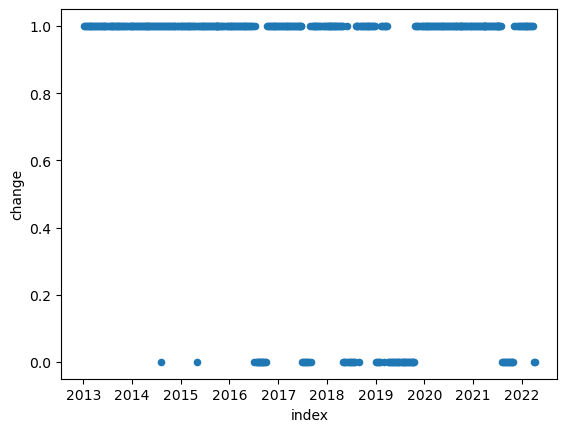

In [86]:
import matplotlib.pyplot as plt

plot_data = df1[target].iloc[START:].copy()
plot_data
plot_data.reset_index().plot.scatter(x="index", y="change",cmap='coolwarm')